In [3]:
import matplotlib.pyplot as plt
import numpy as np
from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg

In [4]:
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([200*4.2e6,240,2.5,1.3,1.3,1.3])
parameter_labels=[['eqparam','c_ao'],['func3','a'],['func3','b'],['func4','factor_oc'],['func4','factor_kwv'],['func4','factor_kair']]
parameter_levels=np.array([None,None,None,None,None,None])


Parameters=[]
for i in range(6):
    Parameters.append({'name':parameter_labels[i],
                       'level':parameter_levels[i],
                       'range': np.linspace(Pmin[i],Pmax[i],2)})

# Parameter experiments - HadCM3 config

In [5]:
config_HadCM3=importer('Experiments/HadCM3/Config_HadCM3.ini')
parallel_config = {'number_of_parameters': 1, 'number_of_cycles': 1,'number_of_parallels': 2}
variable_importer(config_HadCM3,initialZMT=True,parallel=True,parallel_config=parallel_config)
config_HadCM3,Sellers=add_sellersparameters(config_HadCM3, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
elevation=-0.0065*np.array(Sellers[1][1])

Loading Configuration from: Experiments/HadCM3/Config_HadCM3.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini


In [6]:
for i in range(6):
    print('---------- HadCM3 Parameter '+str(i)+' -----------')
    ZOEE=ZOEE_optimization(1,Parameters[i]['name'],Parameters[i]['level'],True,elevation)
    config_overwrite=ZOEE._overwrite_parameters(config_HadCM3,Parameters[i]['range'])
    #config_addparameters=add_parameters(config_addsellers,parameter_values,parameter_labels)

    variable_importer(config_overwrite,initialZMT=True,parallel=True,parallel_config=parallel_config,control=True)
    CTRL=rk4alg(config_overwrite)

    variable_importer(config_overwrite,initialZMT=False,parallel=True,parallel_config=parallel_config,control=False)
    Vars.T=CTRL[1][-1]
    FULL=rk4alg(config_overwrite)
    
    #np.savetxt('Experiments/Output/Parametertest_HadCM3_'+str(i)+'.txt',
    #           [Parameters[i]['range'], *np.transpose(CTRL[1][-1]), *FULL[2]],
    #           delimiter=',')
print('HadCM3 - Finished. Next: CESM')

---------- HadCM3 Parameter 0 -----------
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


/home/benni/University/GMD_Paper/ZOEE_Package/ZOEE/modules/functions.py:2472: RuntimeWarning: overflow encountered in square
  e = e0 * (1 - 0.5 * eps * L * Vars.tempdif / (Rd * np.array(Vars.T[:, 1:]) ** 2))
/home/benni/University/GMD_Paper/ZOEE_Package/ZOEE/modules/functions.py:2527: RuntimeWarning: overflow encountered in square
  dq = eps ** 2 * L * e * Vars.tempdif / (p * Rd * np.array(Vars.T[:, 1:]) ** 2)
/home/benni/University/GMD_Paper/ZOEE_Package/ZOEE/modules/functions.py:1311: RuntimeWarning: overflow encountered in multiply
  a1 = Vars.meridional * Vars.T[:, 1:]


KeyboardInterrupt: 

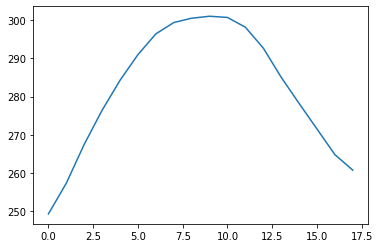

In [15]:
plt.plot(CTRL[1][-1][1])

# Parameter experiments - CESM config

In [32]:
config_CESM=importer('Experiments/CESM/Config_CESM.ini')
parallel_config = {'number_of_parameters': 1, 'number_of_cycles': 1,'number_of_parallels': 2}
variable_importer(config_CESM,initialZMT=True,parallel=True,parallel_config=parallel_config)
config_CESM,Sellers=add_sellersparameters(config_CESM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
elevation=-0.0065*np.array(Sellers[1][1])

Loading Configuration from: Experiments/CESM/Config_CESM.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini


In [33]:
for i in range(6):
    print('---------- CESM Parameter '+str(i)+' -----------')
    ZOEE=ZOEE_optimization(1,Parameters[i]['name'],Parameters[i]['level'],True,elevation)
    config_overwrite=ZOEE._overwrite_parameters(config_CESM,Parameters[i]['range'])
    #config_addparameters=add_parameters(config_addsellers,parameter_values,parameter_labels)

    variable_importer(config_overwrite,initialZMT=True,parallel=True,parallel_config=parallel_config,control=True)
    CTRL=rk4alg(config_overwrite)

    variable_importer(config_overwrite,initialZMT=False,parallel=True,parallel_config=parallel_config,control=False)
    Vars.T=CTRL[1][-1]
    FULL=rk4alg(config_overwrite)
    
    np.savetxt('Experiments/Output/Parametertest_CESM_'+str(i)+'.txt',
               [Parameters[i]['range'], *np.transpose(CTRL[1][-1]), *FULL[2]],
               delimiter=',')
print('CESM - Finished. Next: Pages')

---------- CESM Parameter 0 -----------
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


KeyboardInterrupt: 

# Parameter experiments - Pages config

In [30]:
config_Pages=importer('Experiments/Pages2k/Config_Pages.ini')
parallel_config = {'number_of_parameters': 1, 'number_of_cycles': 1,'number_of_parallels': 2}
variable_importer(config_Pages,initialZMT=True,parallel=True,parallel_config=parallel_config)
config_Pages,Sellers=add_sellersparameters(config_Pages, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
elevation=-0.0065*np.array(Sellers[1][1])

Loading Configuration from: Experiments/Pages2k/Config_Pages.ini
Loading Parameters from: ZOEE/config/SellersParameterization.ini


In [31]:
for i in range(6):
    print('---------- Pages Parameter '+str(i)+' -----------')
    ZOEE=ZOEE_optimization(1,Parameters[i]['name'],Parameters[i]['level'],True,elevation)
    config_overwrite=ZOEE._overwrite_parameters(config_Pages,Parameters[i]['range'])
    #config_addparameters=add_parameters(config_addsellers,parameter_values,parameter_labels)

    variable_importer(config_overwrite,initialZMT=True,parallel=True,parallel_config=parallel_config,control=True)
    CTRL=rk4alg(config_overwrite)

    variable_importer(config_overwrite,initialZMT=False,parallel=True,parallel_config=parallel_config,control=False)
    Vars.T=CTRL[1][-1]
    FULL=rk4alg(config_overwrite)
    
    np.savetxt('Experiments/Output/Parametertest_Pages_'+str(i)+'.txt',
               [Parameters[i]['range'], *np.transpose(CTRL[1][-1]), *FULL[2]],
               delimiter=',')
print('Pages - Finished. Thanks Elisa!')

---------- Pages Parameter 0 -----------
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


KeyboardInterrupt: 